In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIML Dataset.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.shape

(6362620, 11)

In [8]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [10]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)

np.float64(0.13)

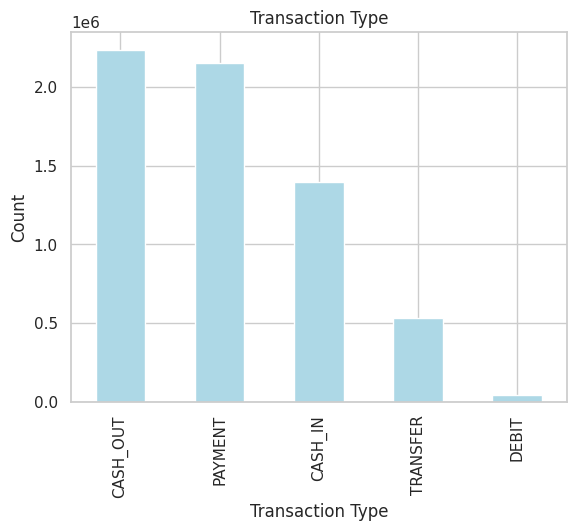

In [11]:
df["type"].value_counts().plot(kind="bar",color = "lightblue" )
plt.title("Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [12]:
fraud_rate_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)

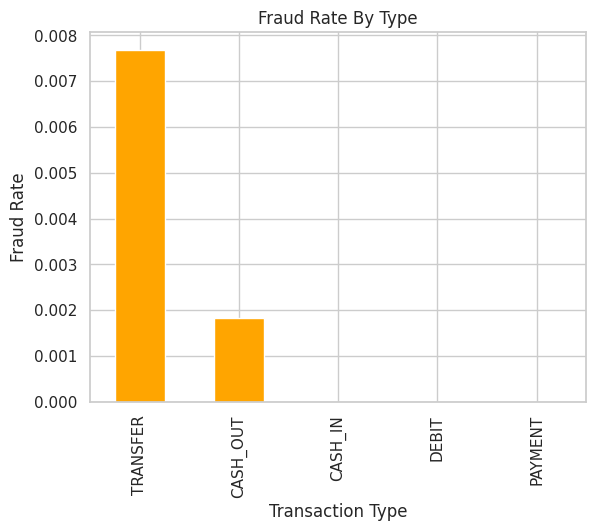

In [13]:
fraud_rate_by_type.plot(kind="bar",title = "Fraud Rate By Type",color = "orange")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

In [14]:
df["amount"].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


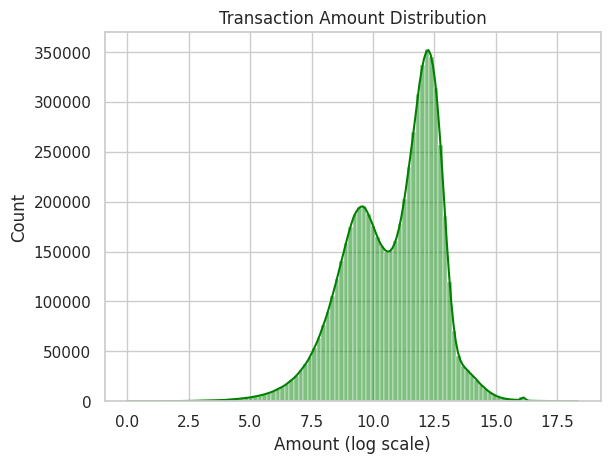

In [15]:
sns.histplot(np.log1p(df["amount"]),bins = 100, kde = True,color = "green")
plt.xlabel("Amount (log scale)")
plt.title("Transaction Amount Distribution")
plt.show()

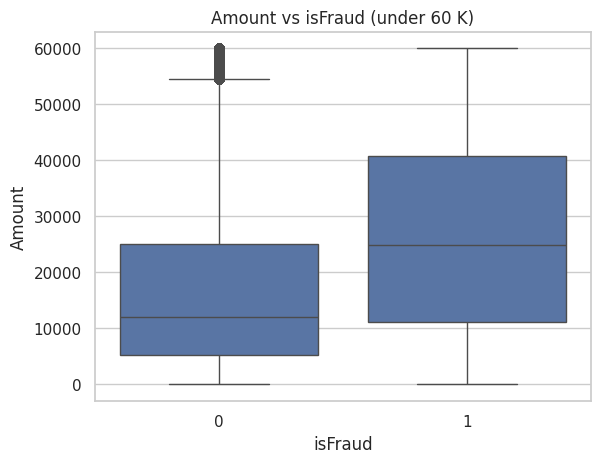

In [16]:
sns.boxplot(data = df[df["amount"] < 60000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud (under 60 K)")
plt.xlabel("isFraud")
plt.ylabel("Amount")
plt.show()

In [17]:
balanceDiffOrg = df['oldbalanceOrg'] - df['newbalanceOrig']
balanceDiffDest = df['newbalanceDest'] - df['oldbalanceDest']

In [18]:
(balanceDiffOrg < 0).sum()

np.int64(1399253)

In [19]:
(balanceDiffDest < 0).sum()

np.int64(1238864)

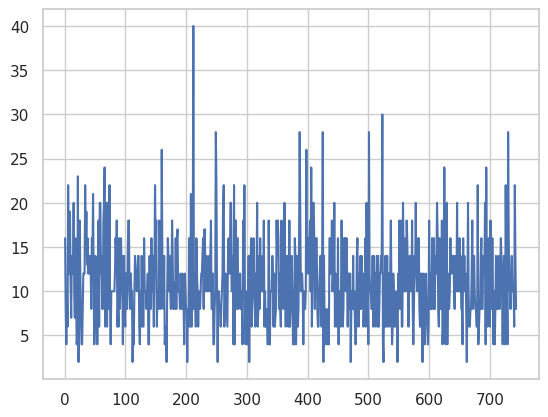

In [20]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label = "Frauds Per Step")

In [21]:
df.drop(columns="step",inplace=True)

In [22]:
top_senders = df["nameOrig"].value_counts().head(10)
top_receivers = df["nameDest"].value_counts().head(10)


In [23]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [24]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [25]:
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [26]:
fraud_users.head()

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1


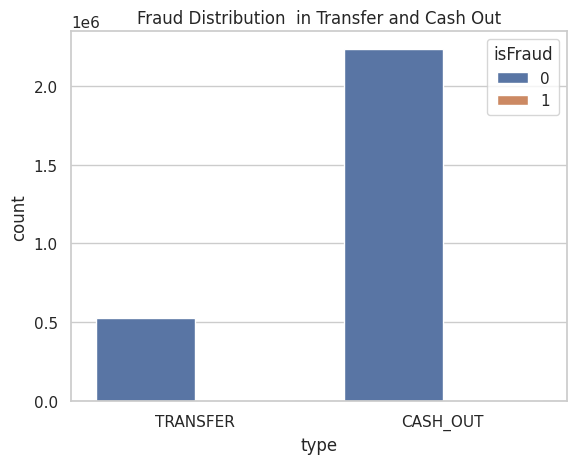

In [27]:
sns.countplot(data = fraud_types, x = "type", hue = "isFraud")
plt.title("Fraud Distribution  in Transfer and Cash Out")
plt.show()

In [28]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

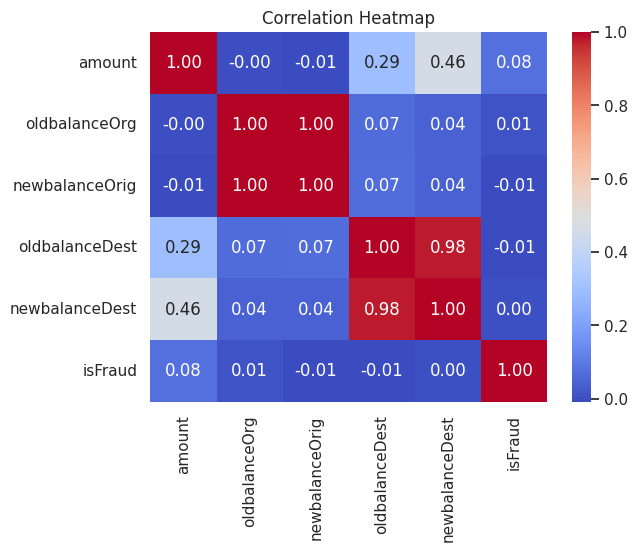

In [29]:
sns.heatmap(data=corr, annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [31]:
zero_after_transfer.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
60,CASH_OUT,82940.31,C1528834618,3017.87,0.0,C476800120,132372.0,49864.36,0,0
72,CASH_OUT,94253.33,C1718906711,25203.05,0.0,C977993101,99773.0,965870.05,0,0


Model Selection and Feature Engineering


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

In [34]:
categorical = ["type"]
numerical = ["oldbalanceOrg","amount","newbalanceOrig","oldbalanceDest","newbalanceDest"]


In [35]:
X = df_model.drop("isFraud",axis=1)
y = df_model["isFraud"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [37]:
X_train.shape

(4453834, 6)

In [38]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numerical),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder = "drop"
)

In [39]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [40]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['oldbalanceOrg', 'amount',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [41]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

y_pred = (y_prob > 0.99).astype(int)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.33      0.60      0.43      2464

    accuracy                           1.00   1908786
   macro avg       0.67      0.80      0.71   1908786
weighted avg       1.00      1.00      1.00   1908786



In [43]:
confusion_matrix(y_test,y_pred)

array([[1903363,    2959],
       [    992,    1472]])

In [44]:
pipeline.score(X_test,y_test) * 100

94.67462565211606

In [45]:
import joblib

In [46]:
joblib.dump(pipeline,"Fraud_Detection_Log_model.pkl")

['Fraud_Detection_Log_model.pkl']